In [101]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()

# sinc (x)

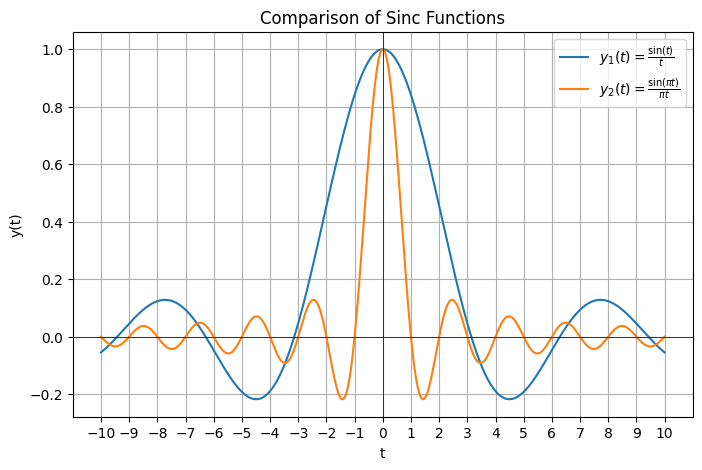

In [102]:
def sinc(t):
    return np.sinc(t / np.pi)  # sinc(x) in NumPy is sin(pi*x)/(pi*x)

def modified_sinc(t): # normalized sinc function (divide by pi)
    return np.sinc(t)

t = np.linspace(-10, 10, 1000)

plt.figure(figsize=(8, 5))
plt.plot(t, sinc(t), label=r'$y_1(t) = \frac{\sin(t)}{t}$')
plt.plot(t, modified_sinc(t), label=r'$y_2(t) = \frac{\sin(\pi t)}{\pi t}$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xticks(np.arange(-10, 11, 1))  # Set x-ticks to integers from -10 to 10
plt.legend()
plt.title("Comparison of Sinc Functions")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid()
plt.show()

# q1

In [103]:
# Define symbolic variables
t, w, t0, tau = sp.symbols('t w t0 tau', real=True)

# Define the rect function
rect = sp.Piecewise((1, t - sp.Abs(t0) <= tau/2), (0, True))
rect


⎧1  for τ ≥ 2⋅t - 2⋅│t₀│
⎨                       
⎩0       otherwise      

In [104]:
# define the integrand for rect = 1 only
integrand = 1 * sp.exp(-sp.I * w * (t-t0))
display(integrand)

# Define the integral for the Fourier Transform
X_w = sp.integrate(integrand, (t, -tau/2, tau/2))
X_w

⎧             ⅈ⋅τ⋅w              -ⅈ⋅τ⋅w            
⎪             ─────              ───────           
⎪     ⅈ⋅t₀⋅w    2        ⅈ⋅t₀⋅w     2              
⎪  ⅈ⋅ℯ      ⋅ℯ        ⅈ⋅ℯ      ⋅ℯ                  
⎨- ──────────────── + ──────────────────  for w ≠ 0
⎪         w                   w                    
⎪                                                  
⎪                  ⅈ⋅t₀⋅w                          
⎩               τ⋅ℯ                       otherwise

# q2

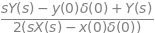

In [105]:
s = sp.Symbol('s')
Y_s = sp.Function('Y')(s)
X_s = sp.Function('X')(s)
y_0 = sp.Symbol('y(0)')
x_0 = sp.Symbol('x(0)')
delta_t = sp.DiracDelta(0)

# Given transfer function equation
numerator = s * Y_s - y_0 * delta_t + Y_s
denominator = 2 * s * X_s - x_0 * delta_t * 2

# Solve for H(s)
H_s = sp.simplify(numerator / denominator)

# Display result
display(H_s)


# 4

In [114]:
ω = sp.symbols('ω', real=True)

x_t = sp.DiracDelta(t - t0)

integrand = x_t * sp.exp(-sp.I * ω * t)
display(integrand)

# Expression for the given function in frequency domain
X_omega = sp.integrate(integrand, (t, -sp.oo, sp.oo))
display(X_omega)